<a href="https://colab.research.google.com/github/HisakaKoji/try/blob/main/darts_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   darts.models

https://medium.com/unit8-machine-learning-publication/darts-time-series-made-easy-in-python-5ac2947a8878



In [1]:
!pip install statsmodels

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('query_result_2020-12-08T07_33_02.953778Z.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (27,28,29,30,31,32) have mixed types.Specify dtype option on import or set low_memory=False.



In [11]:
df['Jst Tm'] = pd.to_datetime(df['Jst Tm'])

In [12]:
df['date'] = df['Jst Tm'].dt.date

In [19]:
test = df[(df['date'] > pd.to_datetime('2020-10-01')) & (df['date'] < pd.to_datetime('2020-11-01'))]

In [123]:
collect = df.groupby(['date']).size()

In [124]:
collect.values

array([ 291,   35,  440,  369,  389,  474,  378,   46,  334,  386,  436,
        379,  383,  376,  400,  329,  379,  391,  397,  350,  295,  340,
        331,  323,  404,  451,  455, 1014,  582,  471,  516,  670,  732,
        631,  603,  515,  511,  623,  532,  484,  478,  806,  522,  472,
        482,  481,  486,  568,  516,  674,  617,  614,  557,  472,  361,
        521, 1041,  508,  452,  515,   77])

In [145]:
import statsmodels.api as sm


In [146]:

# 単位根検定(ADF検定)
adf_result = sm.tsa.stattools.adfuller(collect.values)


In [147]:
adf_result

(-4.679629302865759,
 9.188882636930977e-05,
 0,
 60,
 {'1%': -3.5443688564814813,
  '10%': -2.5931902777777776,
  '5%': -2.9110731481481484},
 637.0071212982273)

In [149]:
stat = adf_result[0]     # 統計量
pvalue = adf_result[1] 

In [151]:
!pip install u8darts

     |████████████████████████████████| 133kB 9.2MB/s 
     |████████████████████████████████| 788kB 14.2MB/s 
     |████████████████████████████████| 6.8MB 22.9MB/s 
     |████████████████████████████████| 14.6MB 31.9MB/s 
     |████████████████████████████████| 25.9MB 129kB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 8.7MB 10.1MB/s 
     |████████████████████████████████| 10.5MB 22.9MB/s 
     |████████████████████████████████| 112kB 46.9MB/s 
     |████████████████████████████████| 358kB 36.8MB/s 
  Created wheel for holidays: filename=holidays-0.10.2-cp36-none-any.whl size=111560 sha256=c06d450c80a0b4c8b22f7144ee79f96c12496ac355959ca4eb0460ba120322b7
  Stored in directory: /root/.cache/pip/wheels/68/55/29/95836cc75cbf85e6b7382e3e569613d6c050fcbe38d776ea64
Successfully built holidays
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requir

In [24]:
import pandas as pd
df = pd.read_csv('test.csv')

In [27]:
from darts import TimeSeries
series = TimeSeries.from_dataframe(df, time_col='date', value_cols='Rid')

In [28]:
series

             Rid
date            
2020-10-11   440
2020-10-12   369
2020-10-13   389
2020-10-14   474
2020-10-15   378
2020-10-16    46
2020-10-17   334
2020-10-18   386
2020-10-19   436
2020-10-20   379
2020-10-21   383
2020-10-22   376
2020-10-23   400
2020-10-24   329
2020-10-25   379
2020-10-26   391
2020-10-27   397
2020-10-28   350
2020-10-29   295
2020-10-30   340
2020-10-31   331
2020-11-01   323
2020-11-02   404
2020-11-03   451
2020-11-04   455
2020-11-05  1014
2020-11-06   582
2020-11-07   471
2020-11-08   516
2020-11-09   670
2020-11-10   732
2020-11-11   631
2020-11-12   603
2020-11-13   515
2020-11-14   511
2020-11-15   623
2020-11-16   532
2020-11-17   484
2020-11-18   478
2020-11-19   806
2020-11-20   522
2020-11-21   472
2020-11-22   482
2020-11-23   481
2020-11-24   486
2020-11-25   568
2020-11-26   516
2020-11-27   674
2020-11-28   617
2020-11-29   614
2020-11-30   557
2020-12-01   472
2020-12-02   361
2020-12-03   521
2020-12-04  1041
2020-12-05   508
2020-12-06   4

In [22]:
train, val = series.split_after(pd.Timestamp('20201011'))

In [67]:
train, val = series.split_after(pd.Timestamp('20201201'))
from darts.models import ExponentialSmoothing

# モデル生成
model = ExponentialSmoothing()

# 学習
model.fit(train) 

# 予測 (predictには予測数を入れることに注意)
prediction = model.predict(40)

                     0
2020-11-26  533.526318
2020-11-27  584.046753
2020-11-28  591.664685
2020-11-29  684.108878
2020-11-30  591.148684
2020-12-01  670.518323
2020-12-02  586.398779
2020-12-03  517.772656
2020-12-04  595.672610
2020-12-05  593.713351
2020-12-06  597.670129
2020-12-07  580.114676
2020-12-08  592.756699
Freq: D

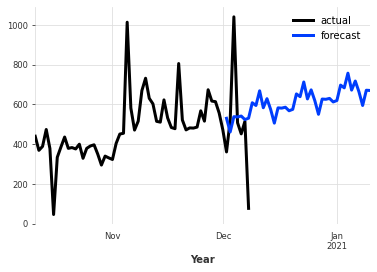

In [68]:
import matplotlib.pyplot as plt

series.plot(label='actual', lw=3)
prediction.plot(label='forecast', lw=3)
plt.legend()
plt.xlabel('Year');

In [69]:
from darts.models import AutoARIMA
model_aarima = AutoARIMA()
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(60)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



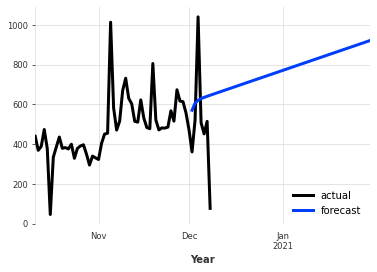

In [70]:
import matplotlib.pyplot as plt

series.plot(label='actual', lw=3)
prediction_aarima.plot(label='forecast', lw=3)
plt.legend()
plt.xlabel('Year');

In [72]:
from darts.models import Prophet
models = [ExponentialSmoothing(), Prophet()]
backtests = [model.historical_forecasts(series,
                            start=.5,
                            forecast_horizon=3)
             for model in models]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimizati

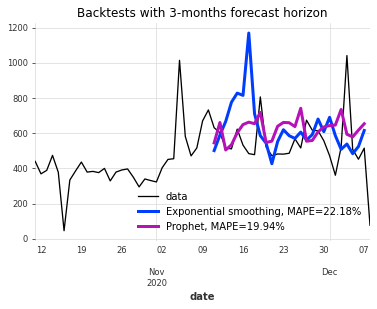

In [73]:
from darts.metrics import mape
series.plot(label='data')
for i, m in enumerate(models):
    err = mape(backtests[i], series)
    backtests[i].plot(lw=3, label='{}, MAPE={:.2f}%'.format(m, err))
plt.title('Backtests with 3-months forecast horizon')
plt.legend()

In [39]:
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
  #  ARIMA,
  #  AutoARIMA,
    StandardRegressionModel,
    Theta,
    FFT
)

for model in (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
  #  ARIMA,
  #  AutoARIMA,
    # StandardRegressionModel, -> 初期化時にtrain_n_points が必要
    Theta,
    FFT
):
    m = model()
    m.fit(train)
    pred = m.predict(len(val))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
[2020-12-08 09:39:05,421] INFO | darts.models.theta | Theta model inferred seasonality of training series: 4
[2020-12-08 09:39:05,421] INFO | darts.models.theta | Theta model inferred seasonality of training series: 4
INFO:darts.models.theta:Theta model inferred seasonality of training series: 4
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:572: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



In [46]:
from darts.backtesting import backtest_forecasting

ModuleNotFoundError: ignored

In [45]:
!pip install darts

In [40]:
from darts.backtesting import backtest_forecasting

models = [ExponentialSmoothing, AutoARIMA, Prophet]
backtests = [
    backtest_forecasting(series=series,
                         model=model(),
                         start=pd.Timestamp('20201101'),
                         fcast_horizon_n=3)
    for model in models
]

ModuleNotFoundError: ignored